# Sales Analysis

Exploratory Data Analysis for sales in a store of different products throughout the year.
Dataset contains individual csv files of each month and it has details of all the sales througout the month like Address, product, cost, etc.

The analysis is for determining different products sold, month and time with maximum sales, state store that sales most and various other conclusions that can be drawn.

The data is taken from the Keith Galli Github page and its analysis can be found on his youtube channel (https://youtu.be/eMOA1pPVUc4)

## STEP -1 LOADING THE DATASET AND IMPORTING IMPORTANT LIBRARIES

#### Import necessary library

Using **Pandas** for cleaning and preparing the dataset. **Matplotlib and seaborn** library is used for visualization in graphs, plots, etc.
**os** library will be used in loading and combining dataset of each month into a single csv file.

In [186]:
import pandas as pd
import os
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns

##### LOOKING INTO THE DATASET

os.listdir() method is used for finding the list of all the files inside a directory. Passing file path list all the files inside.

In [187]:
os.listdir('./SalesAnalysis/Sales_Data')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

As it is observed that we have individual files for each month. So, to create a better dataset, next step will be to merge all months csv file into a single combined csv dataset file.

We will loop through each csv file and concat it to a DataFrame file created.

#### Merging the 12 months of data into a single csv file

In [188]:
files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')] 
# lists all the csv files into a single "files" list

# Creating an empty dataframe using pandas pd.DataFrame() method
all_months_data = pd.DataFrame()

# Looping through each file and concat it to all_month_data dataframe
for file in files:
    print(file)
    df = pd.read_csv('./SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

# Finally, saving the dataframe as all_data.csv to our current folder
all_months_data.to_csv('all_data.csv', index=False)
all_months_data

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


## STEP -2 GETTING BASIC INFORMATION OF THE DATASET. 

Basic information are information like number of rows, columns, index, column names, NaN values, duplicate rows, etc

In [189]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [190]:
all_data.shape

(186850, 6)

In [191]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


Number of rows in our dataset is 186850 and .info() method tells us that only 186305 columns out of all contains non null values. It clearly states that rest values are NaN values.

##### Getting the list of all columns and the types of data they store

In [193]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [194]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [195]:
all_data.index

RangeIndex(start=0, stop=186850, step=1)

### CLEANING THE DATASET

#### This method involves finding NaN values, duplicate rows, etc and acting on it either by removing it or substituting it with correct values.

#### Fixing the NaN values and duplicated rows

In [196]:
all_data.duplicated().sum()

1162

.duplicated() method gives the boolean True/False value at each row index taking into account if that row is the duplicate of previous row.

.sum() method over duplicated() sums the booleans value and gives the number of total True values.

There are total 1162 duplicate rows in the datset

##### Getting duplicate rows

In [197]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"


Since the duplicate rows are of no use, these are needed to be dropped.

Dropping the duplicate rows using .drop_duplicates() method of pandas.
inplace = True makes the changes in the original/main dataset.

In [198]:
all_data.drop_duplicates(inplace=True)

all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [199]:
all_data.shape

(185688, 6)

It can be observed here that rows of the dataset have been reduced.
186850 - 1162 = 185688

Checking for the NaN values in the dataset. Adding a new column 'isna_sum' that sums all the number of NaN values along that particular row.

In [200]:
all_data['isna_sum'] = all_data.isna().sum(axis=1)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,isna_sum
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",0
1,NaN,NaN,NaN,NaN,NaN,NaN,6
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",0
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",0


Total there are 6 column, checking for number of NaN values contained in each row.

In [202]:
all_data[all_data.isna_sum == 6]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,isna_sum
1,NaN,NaN,NaN,NaN,NaN,NaN,6


In [203]:
all_data.Product.isna().sum()

1

In [204]:
for i in all_data.columns:
    print(i, all_data[str(i)].isna().sum())

Order ID 1
Product 1
Quantity Ordered 1
Price Each 1
Order Date 1
Purchase Address 1
isna_sum 0


The above code shows that that there is only one NaN value in each column and in the previous step, it was found at index 1.

In [205]:
all_data.loc[1]

Order ID            NaN
Product             NaN
Quantity Ordered    NaN
Price Each          NaN
Order Date          NaN
Purchase Address    NaN
isna_sum              6
Name: 1, dtype: object

##### Dropping the NaN value row

In [206]:
all_data.dropna(inplace=True)

In [207]:
all_data.shape

(185687, 7)

In [209]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,isna_sum
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",0
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",0
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",0
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",0


Dropping the 'isna_sum' column

In [210]:
all_data.drop(columns = ['isna_sum'], inplace=True)

all_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
131023,204095,Bose SoundSport Headphones,1,99.99,05/12/19 11:29,"880 Madison St, Seattle, WA 98101"
109874,166397,Apple Airpods Headphones,1,150,03/31/19 21:02,"20 11th St, Dallas, TX 75001"
154318,295214,Lightning Charging Cable,1,14.95,11/10/19 14:53,"713 1st St, Dallas, TX 75001"
29150,246975,ThinkPad Laptop,1,999.99,08/12/19 18:44,"327 9th St, San Francisco, CA 94016"
13517,189442,Apple Airpods Headphones,1,150,04/09/19 10:45,"118 Hill St, San Francisco, CA 94016"
161202,265481,Vareebadd Phone,1,400,10/24/19 01:46,"807 Jackson St, Boston, MA 02215"
50429,314808,ThinkPad Laptop,1,999.99,12/08/19 11:19,"110 7th St, Dallas, TX 75001"
45457,310051,34in Ultrawide Monitor,1,379.99,12/16/19 20:12,"752 6th St, San Francisco, CA 94016"
33719,298837,27in FHD Monitor,1,149.99,12/08/19 16:59,"525 8th St, Portland, OR 97035"
23431,241515,Apple Airpods Headphones,1,150,08/13/19 17:31,"951 Meadow St, New York City, NY 10001"


Now our dataset is free from all duplicate rows and NaN values. 

##### OUR DATA IS CLEANED.

Next step is getting information from the data.

## STEP -3 GETTING INFORMATION FROM THE DATASET

### Best month for sale

From the datset, we can see that Order Date contains Date and timing for the sale.
For getting the best month, we need to get a new column of month.

In [211]:
all_data.at[4, 'Order Date']

'04/12/19 14:38'

In [212]:
all_data['Order Date'].dtypes

dtype('O')

In [213]:
all_data['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
6         04/29/19 13:03
7         04/02/19 07:46
8         04/12/19 10:58
9         04/24/19 10:38
10        04/08/19 14:05
11        04/18/19 17:18
12        04/15/19 12:18
13        04/16/19 19:23
14        04/22/19 15:09
15        04/19/19 14:29
16        04/04/19 20:30
17        04/27/19 18:41
18        04/03/19 19:42
19        04/03/19 19:42
20        04/27/19 00:30
21        04/28/19 11:42
22        04/04/19 19:25
23        04/09/19 23:35
24        04/11/19 10:23
25        04/05/19 00:35
26        04/09/19 21:38
27        04/27/19 12:20
28        04/20/19 12:00
29        04/24/19 20:39
30        04/07/19 11:31
               ...      
186819    09/05/19 19:00
186820    09/25/19 22:01
186821    09/29/19 07:00
186822    09/16/19 19:21
186823    09/19/19 18:03
186824    09/27/19 10:52
186825    09/26/19 17:21
186827    09/25/19 00:13
186828    09/19/19 17:34


Checking if there is any misplaced or non relevant value in the 'Order Date' column.

total length of each column is 14.
checking if any element length is more of less than 14

In [216]:
all_data[all_data['Order Date'].str.len() != 14]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


So, on analysing it is observed that row 519 had non relevant values.

This row will be dropped. 

Looking into another method for analysing non relevant value in the dataset.

#### Adding a month column.

This will be done by breaking the 'Order Date' string

In [217]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


Getting all the entries of Month column using .unique() method

In [218]:
all_data.Month.unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

An irrelevant value 'Or' is seen. Getting the full row..

In [219]:
all_data[all_data.Month == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


##### ROW 519 - also observed earlier

In [221]:
all_data.loc[519]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Month                             Or
Name: 519, dtype: object

##### Dropping row 519

In [222]:
all_data.drop(519, inplace=True)

In [223]:
all_data.shape

(185686, 7)

In [224]:
all_data.Month.unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [225]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [226]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 7 columns):
Order ID            185686 non-null object
Product             185686 non-null object
Quantity Ordered    185686 non-null object
Price Each          185686 non-null object
Order Date          185686 non-null object
Purchase Address    185686 non-null object
Month               185686 non-null object
dtypes: object(7)
memory usage: 11.3+ MB


## Now our dataset is fully cleaned. It has no NaN, duplicate or non-relevant values.
Moving on to our question - Best Month for sale

But first, convering useful values into numeric column and making month column with month string.

In [227]:
all_data['Month'] = pd.to_numeric(all_data.Month)

In [228]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [229]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Ascending values for month

In [230]:
all_data.sort_values('Month', ascending=True, inplace=True)

Defining dictionary months with keys month integer pointing to month string.

In [231]:
months = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April', 
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
         }

#### CONVERTING MONTH TO STRING using a function that return month string from months dictionary taking in month integer.
.apply() method is used for applying function to the column

In [234]:
def converter(month):
    return months[month]

all_data.Month = all_data.Month.apply(converter)

In [236]:
all_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
118960,175087,Bose SoundSport Headphones,1,99.99,03/14/19 09:40,"75 7th St, San Francisco, CA 94016",March
43323,308006,Lightning Charging Cable,1,14.95,12/03/19 16:22,"833 Hickory St, Austin, TX 73301",December
36981,301947,AA Batteries (4-pack),1,3.84,12/03/19 20:32,"647 Adams St, Los Angeles, CA 90001",December
65583,160129,34in Ultrawide Monitor,1,379.99,02/15/19 13:03,"47 11th St, Seattle, WA 98101",February
44112,308754,Lightning Charging Cable,1,14.95,12/31/19 00:16,"148 West St, Los Angeles, CA 90001",December
185945,258499,ThinkPad Laptop,1,999.99,09/25/19 12:28,"902 5th St, Los Angeles, CA 90001",September
168960,272887,Lightning Charging Cable,1,14.95,10/26/19 17:19,"829 Cedar St, Austin, TX 73301",October
119300,175414,Lightning Charging Cable,1,14.95,03/24/19 17:38,"313 Walnut St, Atlanta, GA 30301",March
21153,239321,USB-C Charging Cable,1,11.95,08/20/19 16:41,"583 Maple St, Boston, MA 02215",August
93549,211731,Bose SoundSport Headphones,1,99.99,06/19/19 11:55,"455 10th St, Seattle, WA 98101",June


In [237]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 69397 to 43515
Data columns (total 7 columns):
Order ID            185686 non-null object
Product             185686 non-null object
Quantity Ordered    185686 non-null object
Price Each          185686 non-null object
Order Date          185686 non-null object
Purchase Address    185686 non-null object
Month               185686 non-null object
dtypes: object(7)
memory usage: 11.3+ MB


In [238]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [239]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 69397 to 43515
Data columns (total 7 columns):
Order ID            185686 non-null object
Product             185686 non-null object
Quantity Ordered    185686 non-null int64
Price Each          185686 non-null float64
Order Date          185686 non-null object
Purchase Address    185686 non-null object
Month               185686 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 11.3+ MB


Dataset looks much better and cleaner now.

Now, adding total price which is quantity*price 

In [240]:
all_data['Total Price'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
170287,274151,ThinkPad Laptop,1,999.99,10/01/19 14:50,"716 Church St, Boston, MA 02215",October,999.99
149739,290848,Wired Headphones,1,11.99,11/13/19 12:22,"957 Dogwood St, San Francisco, CA 94016",November,11.99
182318,255005,iPhone,1,700.00,09/02/19 00:19,"25 West St, Los Angeles, CA 90001",September,700.00
124578,197977,AA Batteries (4-pack),2,3.84,05/20/19 19:32,"275 Cedar St, Los Angeles, CA 90001",May,7.68
11885,187896,Bose SoundSport Headphones,1,99.99,04/15/19 18:49,"482 Church St, Boston, MA 02215",April,99.99
158458,262856,ThinkPad Laptop,1,999.99,10/30/19 20:31,"958 Elm St, San Francisco, CA 94016",October,999.99
153560,294500,Bose SoundSport Headphones,1,99.99,11/04/19 11:49,"461 North St, San Francisco, CA 94016",November,99.99
92892,211110,ThinkPad Laptop,1,999.99,06/30/19 13:08,"35 Cedar St, San Francisco, CA 94016",June,999.99
79106,224678,Wired Headphones,1,11.99,07/01/19 23:07,"920 Wilson St, San Francisco, CA 94016",July,11.99
147296,288518,Wired Headphones,1,11.99,11/20/19 14:33,"447 Hill St, Los Angeles, CA 90001",November,11.99


### Grouping by the Month column to get monthly stats

In [241]:
monthly_df = all_data.groupby('Month')[['Total Price']].sum()
# This gives the total price sum(i.e. total sale) for each month.
monthly_df

,Total Price
Month,
April,3.389218e+06
August,2.241083e+06
December,4.608296e+06
February,2.200078e+06
January,1.821413e+06
July,2.646461e+06
June,2.576280e+06
March,2.804973e+06
May,3.150616e+06


#### Sorting the monthly_df in descending order

In [242]:
monthly_df.sort_values('Total Price', ascending = False)

,Total Price
Month,
December,4.608296e+06
October,3.734778e+06
April,3.389218e+06
November,3.197875e+06
May,3.150616e+06
March,2.804973e+06
July,2.646461e+06
June,2.576280e+06
August,2.241083e+06


#### As observed, December is the month of maximum sales.

# Step -4 Visualization / Plotting the needful parts.

In [243]:
monthly_df.index

Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object', name='Month')

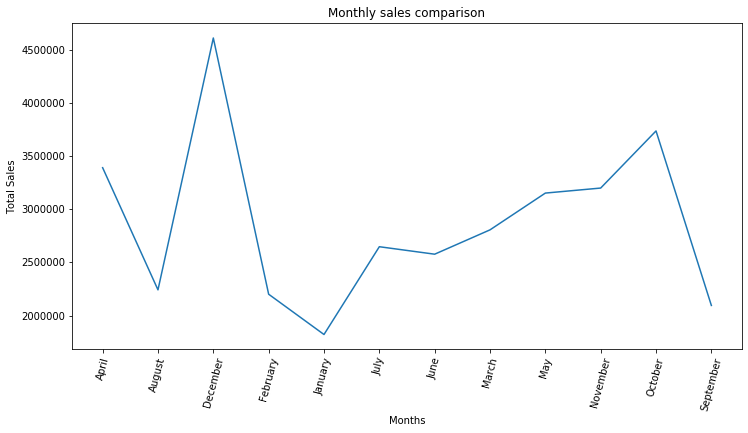

In [244]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df['Total Price'])
plt.xticks(rotation=75)
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.title("Monthly sales comparison");

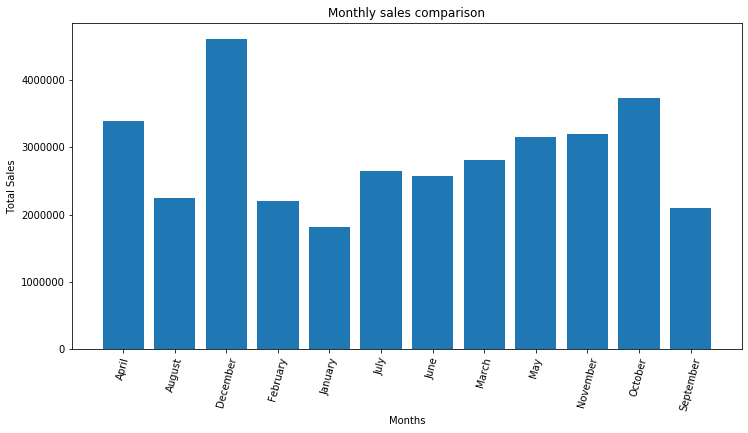

In [245]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_df.index, monthly_df['Total Price'])
plt.xticks(rotation=75)
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.title("Monthly sales comparison");

#### GETTING MONTHLY SALES

In [246]:
for month in months.values():
    print(month, monthly_df.loc[month]['Total Price'])

January 1821413.1599999138
February 2200078.07999996
March 2804973.350000337
April 3389217.9800007213
May 3150616.2300005574
June 2576280.1500001876
July 2646461.3200002224
August 2241083.369999999
September 2094465.6899998987
October 3734777.860000963
November 3197875.0500006215
December 4608295.700001529


In [247]:
monthly_df.loc['January']['Total Price']

1821413.1599999138

### Month wise plot

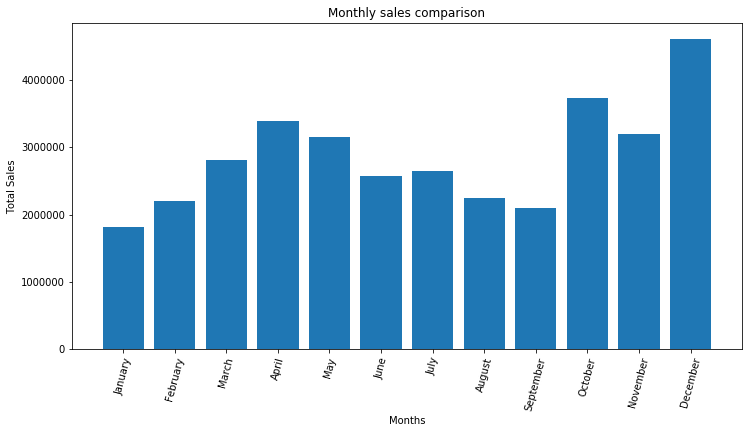

In [248]:
plt.figure(figsize=(12, 6))
plt.bar(months.values(), monthly_df.loc[months.values()]['Total Price'])
plt.xticks(rotation=75)
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.title("Monthly sales comparison");

In [249]:
monthly_count = all_data.groupby('Month')[['Quantity Ordered', 'Total Price']].sum()
monthly_count

,Quantity Ordered,Total Price
Month,,
April,20536,3.389218e+06
August,13429,2.241083e+06
December,28074,4.608296e+06
February,13431,2.200078e+06
January,10893,1.821413e+06
July,16054,2.646461e+06
June,15234,2.576280e+06
March,16979,2.804973e+06
May,18653,3.150616e+06


'Quantity Ordered' of the monthly_count gives total quantity of product buyed and 'Total Price' gives total sales

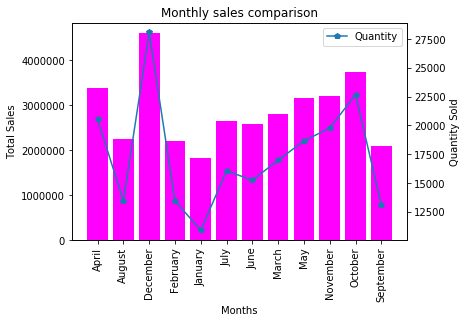

In [272]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(monthly_count.index, monthly_count['Total Price'], color='magenta')
ax2.plot(monthly_count.index, monthly_count['Quantity Ordered'], 'p-')
ax1.set_xticklabels(monthly_count.index, rotation='vertical')
ax1.set_xlabel("Months")
ax1.set_ylabel("Total Sales")
ax2.set_ylabel("Quantity Sold")
plt.title("Monthly sales comparison")
plt.legend(['Quantity'])
plt.show()

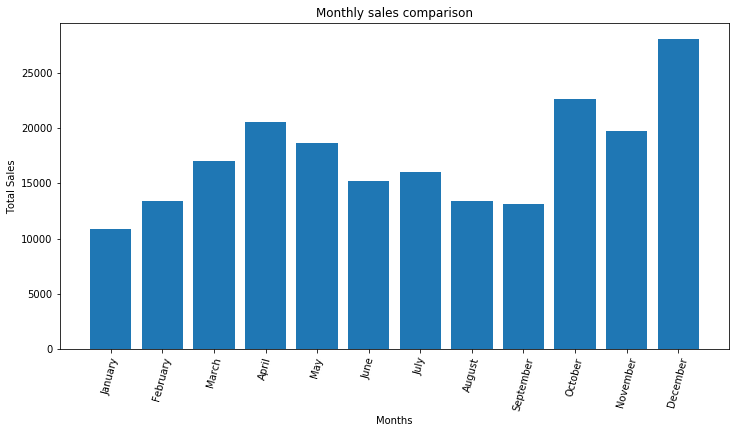

In [281]:
plt.subplots(figsize=(12, 6))
plt.bar(months.values(), monthly_count.loc[months.values()]['Quantity Ordered'])
plt.xticks(rotation=75)
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.title("Monthly sales comparison");

In [282]:
all_data.groupby('Month').sum().max()

Quantity Ordered    2.807400e+04
Price Each          4.583268e+06
Total Price         4.608296e+06
dtype: float64

In [283]:
all_data.Month.value_counts()

December     24944
October      20249
April        18257
November     17544
May          16552
March        15128
July         14275
June         13535
February     11957
August       11943
September    11603
January       9699
Name: Month, dtype: int64

As observed, **December** is the month with most sold items and most sales cost.

## Items sold

In [284]:
quantity_count = all_data['Quantity Ordered'].value_counts()
quantity_count

1    168291
2     13321
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [285]:
priced_item = all_data['Total Price'].value_counts()
priced_item

14.95      20162
11.95      19975
11.99      17328
150.00     15414
3.84       15315
2.99       13699
99.99      13168
149.99      7455
600.00      6846
700.00      6833
389.99      6211
379.99      6156
300.00      4885
1700.00     4717
5.98        4628
999.99      4124
109.99      4070
7.68        3873
400.00      2062
23.90       1713
8.97        1502
23.98       1380
29.90       1344
11.52       1033
11.96        524
15.36        250
14.95        166
35.85        157
35.97        128
199.98       128
44.85         97
19.20         69
17.94         63
299.98        43
219.98        28
20.93         22
759.98        18
23.04         16
779.98        14
47.96         13
47.80         12
59.80          7
1400.00        7
1200.00        7
23.92          5
3400.00        4
800.00         3
26.91          3
1999.98        2
26.88          2
299.97         2
71.70          1
59.75          1
450.00         1
Name: Total Price, dtype: int64

So, single items have been purchased most of the time and purchasing of items which total costs 14.95 has been done most.

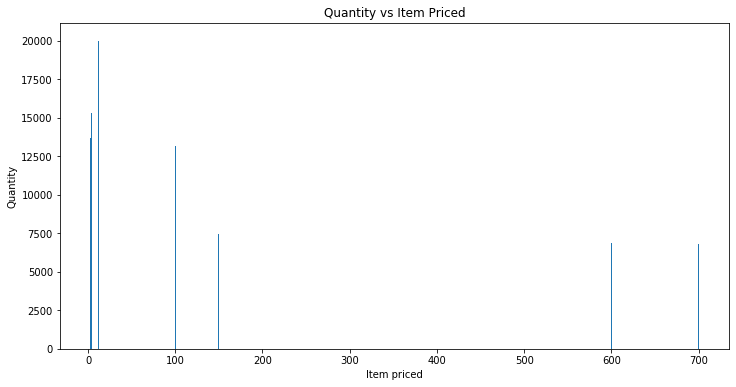

In [286]:
plt.figure(figsize=(12, 6))
plt.bar(priced_item.head(10).index, priced_item.head(10))
plt.title("Quantity vs Item Priced")
plt.xlabel("Item priced")
plt.ylabel("Quantity");

## Which city had the highest number of Sales

Getting list of all the addresses

In [287]:
all_data['Purchase Address'].unique()

array(['402 Chestnut St, Boston, MA 02215',
       '437 Madison St, Atlanta, GA 30301',
       '946 Maple St, New York City, NY 10001', ...,
       '468 Adams St, Los Angeles, CA 90001',
       '126 Dogwood St, Atlanta, GA 30301',
       '830 Willow St, Los Angeles, CA 90001'], dtype=object)

In [288]:
all_data['Purchase Address'].value_counts()

193 Forest St, San Francisco, CA 94016        9
279 Sunset St, San Francisco, CA 94016        8
223 Elm St, Los Angeles, CA 90001             8
640 West St, San Francisco, CA 94016          7
176 North St, San Francisco, CA 94016         7
716 5th St, San Francisco, CA 94016           7
550 Cherry St, San Francisco, CA 94016        7
727 9th St, San Francisco, CA 94016           7
292 Washington St, San Francisco, CA 94016    7
284 Walnut St, San Francisco, CA 94016        7
662 Chestnut St, San Francisco, CA 94016      7
79 Elm St, Boston, MA 02215                   6
307 10th St, San Francisco, CA 94016          6
594 6th St, San Francisco, CA 94016           6
214 11th St, New York City, NY 10001          6
197 Center St, San Francisco, CA 94016        6
706 Hill St, San Francisco, CA 94016          6
549 Jackson St, Los Angeles, CA 90001         6
569 Lake St, Los Angeles, CA 90001            6
353 1st St, Los Angeles, CA 90001             6
181 Cherry St, New York City, NY 10001  

Things have been sold to peoples coming from about 1,40,000 different places.

Getting the information of most sold address -

In [289]:
all_data[all_data['Purchase Address'] == '193 Forest St, San Francisco, CA 94016']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
292,176834,Lightning Charging Cable,1,14.95,04/15/19 20:42,"193 Forest St, San Francisco, CA 94016",April,14.95
131944,204983,Wired Headphones,1,11.99,05/22/19 21:48,"193 Forest St, San Francisco, CA 94016",May,11.99
98799,216739,Google Phone,1,600.00,06/26/19 21:39,"193 Forest St, San Francisco, CA 94016",June,600.00
99307,217225,Apple Airpods Headphones,1,150.00,06/13/19 05:26,"193 Forest St, San Francisco, CA 94016",June,150.00
81555,227007,27in FHD Monitor,1,149.99,07/29/19 23:04,"193 Forest St, San Francisco, CA 94016",July,149.99
81554,227007,USB-C Charging Cable,1,11.95,07/29/19 23:04,"193 Forest St, San Francisco, CA 94016",July,11.95
21818,239970,AA Batteries (4-pack),1,3.84,08/08/19 11:35,"193 Forest St, San Francisco, CA 94016",August,3.84
37817,302746,iPhone,1,700.00,12/12/19 20:50,"193 Forest St, San Francisco, CA 94016",December,700.00
37818,302746,Lightning Charging Cable,1,14.95,12/12/19 20:50,"193 Forest St, San Francisco, CA 94016",December,14.95


To get the list of cities from 'Purchase Address', we need to break the address by ',' and take city and state from it.

In [290]:
all_data['City'] = all_data['Purchase Address'].str.split(',')

In [291]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",January,2.99,"[402 Chestnut St, Boston, MA 02215]"
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",January,300.00,"[437 Madison St, Atlanta, GA 30301]"
70769,144296,Lightning Charging Cable,1,14.95,01/16/19 12:03,"946 Maple St, New York City, NY 10001",January,14.95,"[946 Maple St, New York City, NY 10001]"
70768,144295,USB-C Charging Cable,1,11.95,01/15/19 14:39,"340 Madison St, San Francisco, CA 94016",January,11.95,"[340 Madison St, San Francisco, CA 94016]"
70767,144294,Google Phone,1,600.00,01/13/19 09:56,"306 14th St, Los Angeles, CA 90001",January,600.00,"[306 14th St, Los Angeles, CA 90001]"


##### Getting city and state - 

In [292]:
def get_city(add):
    return add[1] + '(' + add[2][1:3] + ')'

all_data['City'] = all_data['City'].apply(get_city)

In [293]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",January,2.99,Boston(MA)
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",January,300.00,Atlanta(GA)
70769,144296,Lightning Charging Cable,1,14.95,01/16/19 12:03,"946 Maple St, New York City, NY 10001",January,14.95,New York City(NY)
70768,144295,USB-C Charging Cable,1,11.95,01/15/19 14:39,"340 Madison St, San Francisco, CA 94016",January,11.95,San Francisco(CA)
70767,144294,Google Phone,1,600.00,01/13/19 09:56,"306 14th St, Los Angeles, CA 90001",January,600.00,Los Angeles(CA)


In [294]:
# List of all the cities from where purchases have been done

all_data.City.unique()

array([' Boston(MA)', ' Atlanta(GA)', ' New York City(NY)',
       ' San Francisco(CA)', ' Los Angeles(CA)', ' Austin(TX)',
       ' Dallas(TX)', ' Seattle(WA)', ' Portland(OR)', ' Portland(ME)'],
      dtype=object)

In [295]:
cities = all_data.City.value_counts()
cities

 San Francisco(CA)    44662
 Los Angeles(CA)      29564
 New York City(NY)    24847
 Boston(MA)           19901
 Atlanta(GA)          14863
 Dallas(TX)           14797
 Seattle(WA)          14713
 Portland(OR)          9998
 Austin(TX)            9890
 Portland(ME)          2451
Name: City, dtype: int64

In [297]:
city_data = all_data.groupby('City')[['Quantity Ordered', 'Total Price']].sum()
city_data

,Quantity Ordered,Total Price
City,,
Atlanta(GA),16584,2.794199e+06
Austin(TX),11137,1.818044e+06
Boston(MA),22494,3.658628e+06
Dallas(TX),16707,2.765374e+06
Los Angeles(CA),33247,5.448304e+06
New York City(NY),27903,4.661867e+06
Portland(ME),2746,4.493214e+05
Portland(OR),11291,1.870011e+06
San Francisco(CA),50169,8.254744e+06


In [304]:
city_data.sort_values('Total Price', ascending=False)

,Quantity Ordered,Total Price
City,,
San Francisco(CA),50169,8.254744e+06
Los Angeles(CA),33247,5.448304e+06
New York City(NY),27903,4.661867e+06
Boston(MA),22494,3.658628e+06
Atlanta(GA),16584,2.794199e+06
Dallas(TX),16707,2.765374e+06
Seattle(WA),16534,2.745046e+06
Portland(OR),11291,1.870011e+06
Austin(TX),11137,1.818044e+06


From the data, for any city, following conclusion can be drawn - 

For city of New York City(NY), total 24847 purchases have been done with 27903 total purchases and total price of 4661867

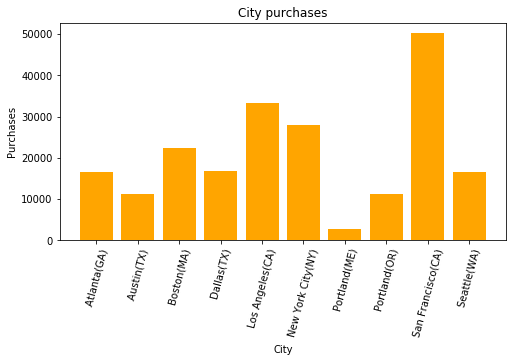

In [299]:
plt.figure(figsize=(8, 4))
plt.title("City purchases")
plt.bar(city_data.index, city_data['Quantity Ordered'], color='orange')
plt.xlabel("City")
plt.ylabel("Purchases")
plt.xticks(rotation = 75);

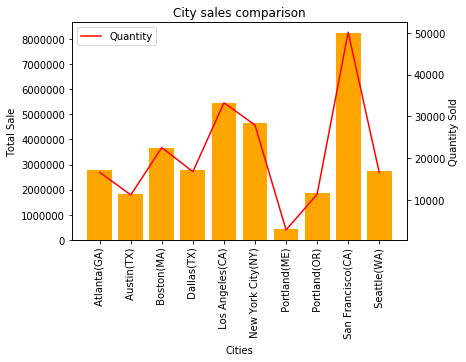

In [302]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(city_data.index, city_data['Total Price'], color='orange')
ax2.plot(city_data.index, city_data['Quantity Ordered'], 'r-')
ax1.set_xticklabels(city_data.index, rotation='vertical')
ax1.set_xlabel("Cities")
ax1.set_ylabel("Total Sale")
ax2.set_ylabel("Quantity Sold")
plt.title("City sales comparison")
plt.legend(['Quantity'])
plt.show()

## What time should we display advertisement for maximum sale

Getting time column

In [305]:
all_data['Time'] = all_data['Order Date'].apply(lambda x: str(x[-5:]))

In [306]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Time
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",January,2.99,Boston(MA),21:01
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",January,300.00,Atlanta(GA),14:37
70769,144296,Lightning Charging Cable,1,14.95,01/16/19 12:03,"946 Maple St, New York City, NY 10001",January,14.95,New York City(NY),12:03
70768,144295,USB-C Charging Cable,1,11.95,01/15/19 14:39,"340 Madison St, San Francisco, CA 94016",January,11.95,San Francisco(CA),14:39
70767,144294,Google Phone,1,600.00,01/13/19 09:56,"306 14th St, Los Angeles, CA 90001",January,600.00,Los Angeles(CA),09:56


In [307]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Total Price         float64
City                 object
Time                 object
dtype: object

In [308]:
all_data.Time.unique()

array(['21:01', '14:37', '12:03', ..., '04:09', '03:23', '04:05'],
      dtype=object)

Adding an hour column to round of time in hours.
using pd.datetime().dt.hour method

In [309]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Time,Hour
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",January,2.99,Boston(MA),21:01,21
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",January,300.00,Atlanta(GA),14:37,14
70769,144296,Lightning Charging Cable,1,14.95,01/16/19 12:03,"946 Maple St, New York City, NY 10001",January,14.95,New York City(NY),12:03,12
70768,144295,USB-C Charging Cable,1,11.95,01/15/19 14:39,"340 Madison St, San Francisco, CA 94016",January,11.95,San Francisco(CA),14:39,14
70767,144294,Google Phone,1,600.00,01/13/19 09:56,"306 14th St, Los Angeles, CA 90001",January,600.00,Los Angeles(CA),09:56,9


In [310]:
hrs_count = all_data.Hour.value_counts()
hrs_count

19    12886
12    12573
11    12392
18    12263
20    12218
13    12115
14    10965
10    10929
21    10905
17    10884
16    10359
15    10159
22     8808
9      8740
23     6262
8      6252
7      4002
0      3902
6      2481
1      2347
5      1320
2      1242
4       852
3       830
Name: Hour, dtype: int64

This clearly shows that maximum items are sold in evening around 7 pm and around 12 noon.

In [311]:
hrs = all_data.groupby('Hour')[['Quantity Ordered', 'Total Price']].sum()
hrs

,Quantity Ordered,Total Price
Hour,,
0,4420,713548.66
1,2616,460563.90
2,1397,234839.45
3,927,145742.94
4,935,162546.07
5,1492,230664.87
6,2809,447963.01
7,4547,744067.32
8,6998,1192309.20


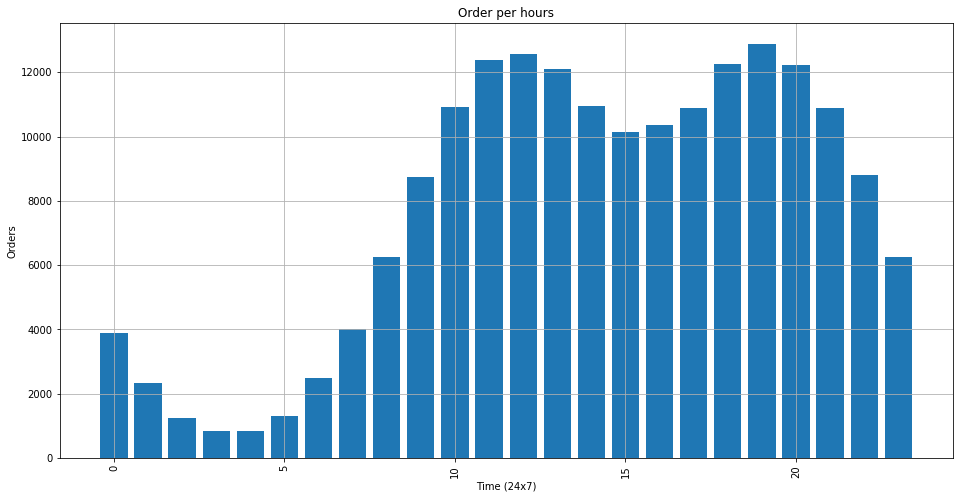

In [312]:
plt.figure(figsize=(16, 8))
plt.bar(hrs.index, hrs_count[hrs.index])
plt.xticks(rotation='vertical')
plt.xlabel("Time (24x7)")
plt.ylabel("Orders")
plt.title("Order per hours")
plt.grid();

So, if some time had to be recommended for advertisement, it should be around 7 PM and 12 noon.

## Product analysis for city of New York

In [313]:
ny_df = all_data[all_data.City == ' New York City(NY)']
ny_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Time,Hour
70769,144296,Lightning Charging Cable,1,14.95,01/16/19 12:03,"946 Maple St, New York City, NY 10001",January,14.95,New York City(NY),12:03,12
70759,144286,Lightning Charging Cable,1,14.95,01/24/19 07:09,"606 10th St, New York City, NY 10001",January,14.95,New York City(NY),07:09,7
70783,144310,Wired Headphones,1,11.99,01/17/19 13:53,"984 Lincoln St, New York City, NY 10001",January,11.99,New York City(NY),13:53,13
70730,144258,Macbook Pro Laptop,1,1700.00,01/25/19 21:36,"650 13th St, New York City, NY 10001",January,1700.00,New York City(NY),21:36,21
70722,144250,Wired Headphones,1,11.99,01/27/19 21:19,"522 6th St, New York City, NY 10001",January,11.99,New York City(NY),21:19,21
70734,144262,ThinkPad Laptop,1,999.99,01/10/19 15:23,"563 Lake St, New York City, NY 10001",January,999.99,New York City(NY),15:23,15
70750,144277,27in FHD Monitor,1,149.99,01/02/19 20:50,"241 West St, New York City, NY 10001",January,149.99,New York City(NY),20:50,20
70747,144274,USB-C Charging Cable,1,11.95,01/22/19 11:04,"642 Hill St, New York City, NY 10001",January,11.95,New York City(NY),11:04,11
70736,144264,34in Ultrawide Monitor,1,379.99,01/16/19 10:52,"416 South St, New York City, NY 10001",January,379.99,New York City(NY),10:52,10
70846,144370,Lightning Charging Cable,2,14.95,01/19/19 19:26,"910 5th St, New York City, NY 10001",January,29.90,New York City(NY),19:26,19


In [314]:
ny_hrs= ny_df.Hour.value_counts()
ny_hrs

19    1750
11    1695
13    1627
20    1622
12    1612
18    1606
21    1500
14    1458
10    1454
17    1445
16    1425
15    1351
9     1174
22    1152
8      857
23     809
0      557
7      515
6      336
1      328
5      204
2      164
4      106
3      100
Name: Hour, dtype: int64

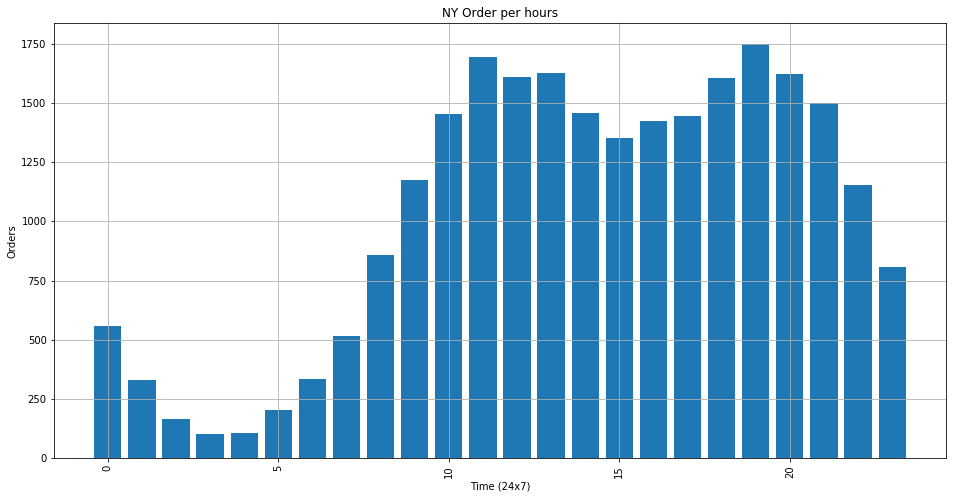

In [315]:
plt.figure(figsize=(16, 8))
plt.bar(hrs.index, ny_hrs[hrs.index])
plt.xticks(rotation='vertical')
plt.xlabel("Time (24x7)")
plt.ylabel("Orders")
plt.title("NY Order per hours")
plt.grid();

## what object is sold most

In [316]:
all_data.Product.unique()

array(['AAA Batteries (4-pack)', 'Flatscreen TV',
       'Lightning Charging Cable', 'USB-C Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones',
       '34in Ultrawide Monitor', '27in 4K Gaming Monitor',
       '27in FHD Monitor', 'iPhone', 'Bose SoundSport Headphones',
       'Macbook Pro Laptop', '20in Monitor', 'AA Batteries (4-pack)',
       'ThinkPad Laptop', 'LG Dryer', 'Vareebadd Phone',
       'LG Washing Machine'], dtype=object)

In [317]:
all_data.Product.value_counts()

USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [318]:
all_data.Product.value_counts().sum()

185686

In [319]:
product_count = all_data.groupby('Product')[['Quantity Ordered', 'Total Price']].sum()
product_count

,Quantity Ordered,Total Price
Product,,
20in Monitor,4126,453818.74
27in 4K Gaming Monitor,6239,2433147.61
27in FHD Monitor,7541,1131074.59
34in Ultrawide Monitor,6192,2352898.08
AA Batteries (4-pack),27615,106041.60
AAA Batteries (4-pack),30986,92648.14
Apple Airpods Headphones,15637,2345550.00
Bose SoundSport Headphones,13430,1342865.70
Flatscreen TV,4813,1443900.00


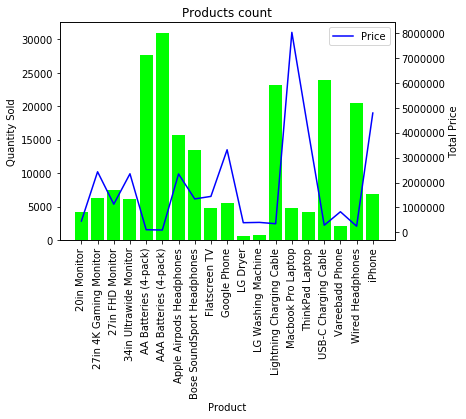

In [320]:
figs, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(product_count.index, product_count['Quantity Ordered'], color='lime')
ax2.plot(product_count.index, product_count['Total Price'], 'b-')
ax1.set_xlabel('Product')
ax1.set_xticklabels(product_count.index, rotation='vertical')
ax1.set_ylabel('Quantity Sold')
ax2.set_ylabel("Total Price")
plt.title("Products count")
plt.legend(['Price'])
plt.show()

It can be concluded that the products having higher prices are sold less and vice versa.